데이터 로딩

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print('데이터셋의 크기:', iris['target'].shape)

데이터셋의 크기: (150,)


In [6]:
print('데이터셋의 내용:\n', iris['target'])

데이터셋의 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print('데이터셋의 크기:', iris['data'].shape)

데이터셋의 크기: (150, 4)


In [8]:
print('데이터셋의 내용:\n', iris['data'][:7,:])

데이터셋의 내용:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [9]:
#2차원 배열 데이터프레임으로 바꾸기 딕셔너리 형태는 1차배열 바꾸기 방법임.
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print('데이터프레임의 형태:', df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#이름 간결하게 변환
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [11]:
#타겟 레이블 열 추가하기
df['Target'] = iris['target']
print('데이터셋의 크기:', df.shape)
#에서 5로  추가된 것 확인
df.head()

데이터셋의 크기: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


데이터 탐색

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
df.describe()
#괄호유무 보기

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
#결측값 확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [15]:
#중복데이터 확인
#행의 값이 모두 같을 때 중복이라고 한다 그 중 한개라도 다르면 중복 아님
df.duplicated().sum()
#sum()있고 없고 차이보기 True의 합

1

In [16]:
#중복데이터 출력
df.loc[df.duplicated(),:] # 행 위치에 부울값 들어감 
#2번쨰 값을 출력함

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [17]:
#중복 데이터 확인해버보기
df.loc[(df.sepal_length ==5.8)&(df.petal_width ==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [18]:
#중복데이터 제거
df= df.drop_duplicates()
df.loc[(df.sepal_length ==5.8)&(df.petal_width ==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [19]:
#상관관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


데이터 시각화

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.2)

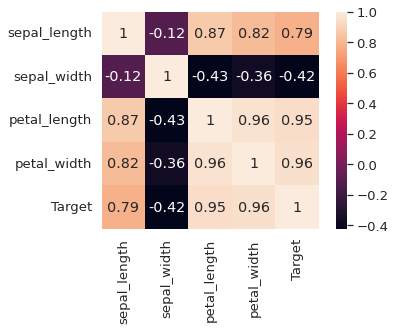

In [21]:
#상관계수 히트맵
sns.heatmap(data = df.corr(), square =True, annot =True, cbar=True) #annot 숫자표시여부
plt.show()

In [22]:
#타겟 레이블의 클래스별 분포

df['Target'].value_counts()   #시리즈에 적용

0    50
1    50
2    49
Name: Target, dtype: int64

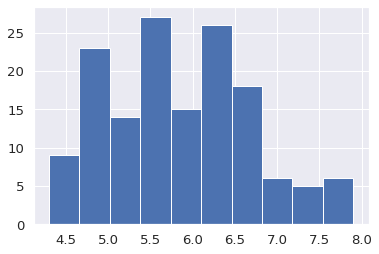

In [23]:
#히스토그램으로 표현하기
plt.hist(data= df, x ='sepal_length')
plt.show()

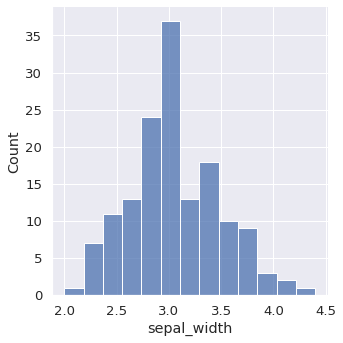

In [24]:
sns.displot(data = df, x = 'sepal_width', kind = 'hist')

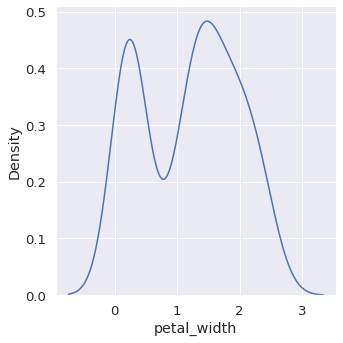

In [25]:
sns.displot(data = df, x = 'petal_width', kind = 'kde')

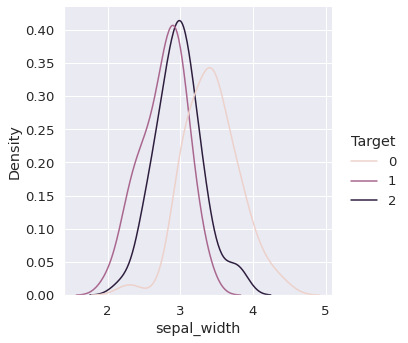

In [26]:
#품종별 sepal_length 값의 분포 비교

sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue ='Target')

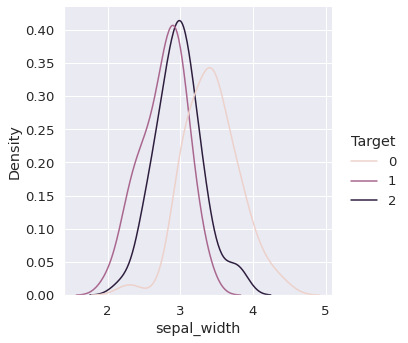

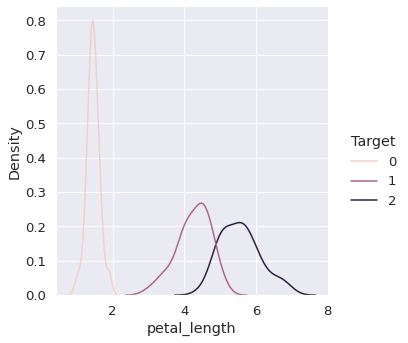

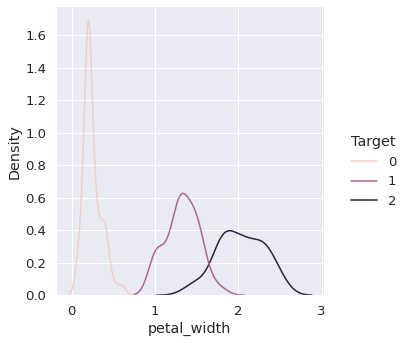

In [27]:
#나머지 피처 데이터를 각가 ㄱ그리기
for col in ['sepal_width','petal_length', 'petal_width']:
  sns.displot(data = df, x = col, kind = 'kde', hue ='Target')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


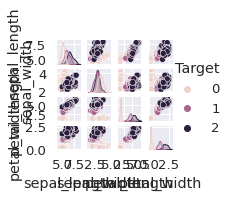

In [28]:
sns.pairplot(df, hue = 'Target', size =0.5, diag_kind = 'kde')
plt.show()

Train-Test 데이터셋 분할

In [29]:
from sklearn.model_selection import train_test_split

x_data = df.loc[:,'sepal_length':'petal_width'] 
y_data = df.loc[:,'Target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, shuffle =True, random_state =20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


분류 알고리즘 - KNN, SVM,로지스틱 회귀, 의사결정나무, 앙상블 모델

In [30]:
#분류 알고리즘 1) KNN

In [31]:
#모델 학습
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
#예측
y_knn_pred = knn.predict(x_test)
print('예측값:', y_knn_pred[:5])

예측값: [0 1 1 2 1]


In [33]:
#성능평가

from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)

print("Accuracy:%.4f" % knn_acc)

Accuracy:0.9667


In [34]:
#분류 알고리즘 1) svm

In [35]:
#모델 학습
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)


SVC()

In [36]:
#예측
y_svc_pred = svc.predict(x_test)
print('예측값:', y_svc_pred[:5])


예측값: [0 1 1 2 1]


In [37]:
#성능평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy:%.4f" % svc_acc)

Accuracy:1.0000


In [38]:
#분류 알고리즘 1) 로지스틱 회귀

In [39]:
#모델학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [40]:
#예측
y_lrc_pred = lrc.predict(x_test)
print('예측값:', y_lrc_pred[:5])

예측값: [0 1 1 2 1]


In [41]:
#성능평가

lrc_acc = accuracy_score(y_test,y_lrc_pred)
print("Accuracy:%.4f" % lrc_acc)

Accuracy:1.0000


In [42]:
#확률값 예측
y_lrc_prob = lrc.predict_proba(x_test)
y_lrc_prob

array([[9.83094486e-01, 1.69054560e-02, 5.76311742e-08],
       [4.60693059e-03, 8.41461547e-01, 1.53931523e-01],
       [1.03676264e-02, 9.20150924e-01, 6.94814501e-02],
       [2.57653283e-05, 5.16405461e-02, 9.48333689e-01],
       [2.39285318e-02, 9.52024720e-01, 2.40467480e-02],
       [2.93670997e-02, 9.25895394e-01, 4.47375060e-02],
       [4.78583010e-06, 1.77674941e-02, 9.82227720e-01],
       [9.80412686e-01, 1.95872007e-02, 1.13568077e-07],
       [1.22345698e-05, 6.66997930e-02, 9.33287972e-01],
       [9.75407023e-01, 2.45929131e-02, 6.41393627e-08],
       [2.73400343e-05, 2.71294869e-02, 9.72843173e-01],
       [1.71532353e-03, 7.49889664e-01, 2.48395012e-01],
       [7.53093548e-04, 4.91872241e-01, 5.07374666e-01],
       [9.84534692e-01, 1.54652799e-02, 2.81281423e-08],
       [9.76954377e-01, 2.30455595e-02, 6.38303729e-08],
       [1.28090919e-03, 2.60490308e-01, 7.38228783e-01],
       [9.91798219e-01, 8.20177022e-03, 1.12007817e-08],
       [4.15678683e-03, 8.61228

In [43]:
#분류 알고리즘 1) 의사결정나무

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3, random_state = 20)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [45]:
#예측
y_dtc_pred = dtc.predict(x_test)
print('예측값:',y_dtc_pred)

예측값: [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 2 1 2 2 0 1 1 1 0 2 2]


In [46]:
#성능평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy:%.4f" % dtc_acc)

Accuracy:0.9333


In [47]:
#분류 알고리즘 1) 앙상블 모델

In [48]:
#보팅
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('knn',knn),('SVM',svc),('DT',dtc)], voting='hard')
hvc.fit(x_train,y_train)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('SVM', SVC()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=20))])

In [49]:
#예측
y_hvc_pred = hvc.predict(x_test)
print('예측값:', y_hvc_pred[:5])

#성능평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("Accuracy:%.4f" % hvc_acc)

예측값: [0 1 1 2 1]
Accuracy:1.0000


In [50]:
#배깅
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=20)

In [51]:
#예측
y_rfc_pred = rfc.predict(x_test)
print('예측값:', y_rfc_pred[:5])

#성능평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("Accuracy:%.4f" % rfc_acc)

예측값: [0 1 1 2 1]
Accuracy:0.9667


In [52]:
#배깅

In [53]:
#모델 학습 및 예측
from  xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state =20)
xgbc.fit(x_train, y_train)

XGBClassifier(n_estimators=50, objective='multi:softprob', random_state=20)

In [54]:
#예측
y_xgbc_pred = xgbc.predict(x_test)
print('예측값:', y_xgbc_pred[:5])

#성능평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("Accuracy:%.4f" % rfc_acc)

예측값: [0 1 1 2 1]
Accuracy:0.9667


교차검증 홀드아웃, k폴드


In [55]:
# 홀드아웃 = 학습데이터 일부를 검증 데이터로 사용하는 방법

In [56]:
#검증용 데이터셋 분리
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train, test_size=0.3,shuffle=True, random_state=20)

print(x_tr.shape , y_tr.shape)
print(x_val.shape, y_val.shape)

(83, 4) (83,)
(36, 4) (36,)


In [58]:
#학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)

RandomForestClassifier(max_depth=3, random_state=20)

In [60]:
#예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)


In [61]:
#검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print('Train Accuracy:%.4f' % tr_acc)
print('Validation Accuracy:%.4f' % val_acc)

Train Accuracy:0.9880
Validation Accuracy:0.9167


In [62]:
#테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:%.4f" % test_acc)

Test Accuracy:0.9000


In [ ]:
#k-fold 홀드아웃 방법을 여러번 반복 하는 것.

In [64]:
#데이터셋을 5개의 Fold로 분할하는 객체 생성
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state =20)
num_fold =1

for tr_idx, val_idx in kfold.split(x_train):
  print('%s Fold-------------------------------' % num_fold)
  print('훈련:', len(tr_idx), tr_idx[:10])
  print('검증:', len(val_idx), val_idx[:10])
  num_fold +=1

1 Fold-------------------------------
훈련: 95 [ 0  3  4  6  7  8  9 10 11 12]
검증: 24 [ 1  2  5 35 37 39 47 48 51 53]
2 Fold-------------------------------
훈련: 95 [ 1  2  3  4  5  6  7  8  9 10]
검증: 24 [ 0 12 19 21 23 31 36 38 44 46]
3 Fold-------------------------------
훈련: 95 [ 0  1  2  3  5  6  7  9 10 12]
검증: 24 [ 4  8 11 14 24 27 29 30 33 41]
4 Fold-------------------------------
훈련: 95 [ 0  1  2  4  5  6  7  8  9 11]
검증: 24 [ 3 10 13 17 18 25 32 43 57 58]
5 Fold-------------------------------
훈련: 96 [ 0  1  2  3  4  5  8 10 11 12]
검증: 23 [ 6  7  9 15 16 20 22 26 28 34]


In [69]:
#랜덤 포레스트 모델을 k-fold 교차 검증으로 평가

val_scores =[]
num_fold =1

for tr_idx, val_idx in kfold.split(x_train, y_train):
   x_tr, x_val = x_train.iloc[tr_idx,:], x_train.iloc[val_idx,:]
   y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
   #학습
   rfc = RandomForestClassifier(max_depth=5, random_state=20)
   rfc.fit(x_tr, y_tr)
   #검증
   y_val_pred = rfc.predict(x_val)
   val_acc = accuracy_score(y_val, y_val_pred)
   print('%d Fold Accuracy:%.4f'% (num_fold, val_acc))
   val_scores.append(val_acc)
   num_fold+=1

1 Fold Accuracy:0.8750
2 Fold Accuracy:1.0000
3 Fold Accuracy:0.9167
4 Fold Accuracy:0.9583
5 Fold Accuracy:0.9565


In [70]:
# 5개 검증 정확도를 평균한다.

import numpy as np

mean_score = np.mean(val_scores)
print('평균검증 Accuracy:', np.round(mean_score,4))

평균검증 Accuracy: 0.9413


In [ ]:
#검증